## I. Setup and Data ##

In [2]:
import pandas as pd
import numpy as np

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00492/Metro_Interstate_Traffic_Volume.csv.gz"
df = pd.read_csv(url, compression='gzip')

In [4]:
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [6]:
df.describe(include='all')

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
count,61,48204.000000,48204.000000,48204.000000,48204.000000,48204,48204,48204,48204.000000
unique,11,NaN,NaN,NaN,NaN,11,38,40575,NaN
top,Labor Day,NaN,NaN,NaN,NaN,Clouds,sky is clear,2013-05-19 10:00:00,NaN
freq,7,NaN,NaN,NaN,NaN,15164,11665,6,NaN
mean,NaN,281.205870,0.334264,0.000222,49.362231,NaN,NaN,NaN,3259.818355
std,NaN,13.338232,44.789133,0.008168,39.015750,NaN,NaN,NaN,1986.860670
min,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000
25%,NaN,272.160000,0.000000,0.000000,1.000000,NaN,NaN,NaN,1193.000000
50%,NaN,282.450000,0.000000,0.000000,64.000000,NaN,NaN,NaN,3380.000000
75%,NaN,291.806000,0.000000,0.000000,90.000000,NaN,NaN,NaN,4933.000000


## Non-Graphical EDA ##

### Task A: ###

In [8]:
mean_val = df['traffic_volume'].mean()
median_val = df['traffic_volume'].median()
mode_val = df['traffic_volume'].mode()[0]  
std_val = df['traffic_volume'].std()
range_val = df['traffic_volume'].max() - df['traffic_volume'].min()

print("Mean :", mean_val)
print("Median :", median_val)
print("Mode :", mode_val)
print("Standard Deviation :", std_val)
print("Range :", range_val)

Mean : 3259.8183553232097
Median : 3380.0
Mode : 353
Standard Deviation : 1986.8606704463589
Range : 7280


#### Analysis Questions: ####

**1. The median traffic volume is (3380) , while the mean traffic volume is (3259.8)**

**So the median is higher than the  mean.**

**2. The median is a bit higher than the mean , this means the distribution of traffic_volume is slightly negatively (left) skewed ,with a few hours of very low traffic volumen.**

### Task B: 

In [ ]:
skewness = df['traffic_volume'].skew()
kurtosis = df['traffic_volume'].kurt()

print("Skewness:", skewness)
print("Kurtosis:", kurtosis)

Skewness: -0.08938135143647916
Kurtosis: -1.3090882117269556


#### Analysis Questions:

**1.The sign of the skewness value is negative → the distribution is left-skewed.**
**The magnitude of the skewness value is very close to zero (-0.089) → The distribution is almost symmetrical ,with a tiny left skew.**
**This matches our earlier result in Task A, where the median was slightly higher than the mean.**

**2. The kurtosis value is (-1.309), which is much lower than 3. This means the distribution is platykurtic — it is flatter and has lighter tails than a normal distribution.**

### Task C:

In [ ]:
weather_stats = df.groupby('weather_main')['traffic_volume'].agg(['mean', 'std']).reset_index()

print(weather_stats)

    weather_main         mean          std
0          Clear  3055.908819  1987.101411
1         Clouds  3618.449749  1906.202879
2        Drizzle  3290.727073  1997.901830
3            Fog  2703.720395  2125.525863
4           Haze  3502.101471  1873.511057
5           Mist  2932.956639  2073.025670
6           Rain  3317.905501  1982.228705
7          Smoke  3237.650000  1978.015893
8           Snow  3016.844228  1900.185883
9         Squall  2061.750000  1950.070490
10  Thunderstorm  3001.620890  1988.296012


#### Analysis Question:

**The highest average traffic volume happens during cloudy weather (mean ≈ 3618).**

**The foggy weather shows the highest variability (std ≈ 2125), meaning traffic changes a lot in fog.**



## Graphical EDA:

### Task A: Histogram for Distribution

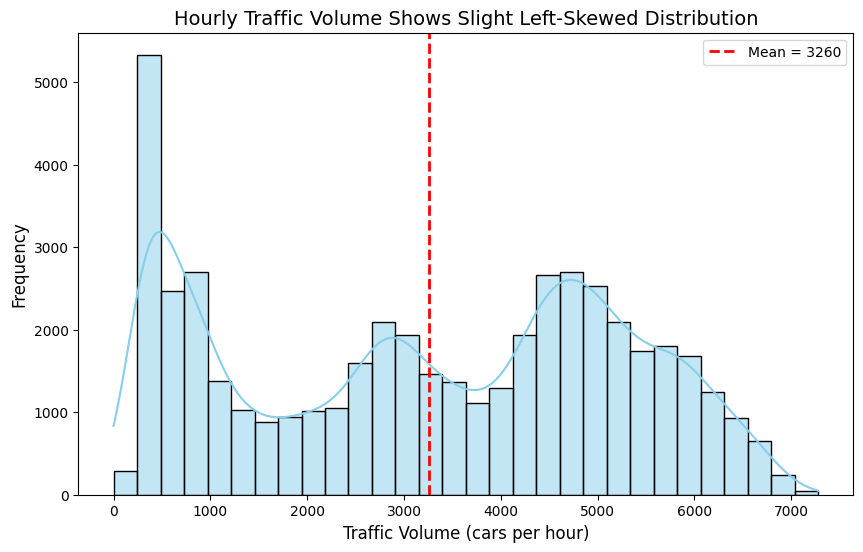

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df['traffic_volume'], bins=30, kde=True, color='skyblue')

mean_value = df['traffic_volume'].mean()


plt.axvline(mean_value, color='red', linestyle='--', linewidth=2, label=f"Mean = {mean_value:.0f}")

plt.title("Hourly Traffic Volume Shows Slight Left-Skewed Distribution", fontsize=14)
plt.xlabel("Traffic Volume (cars per hour)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend()

plt.show()


### Task B: Box Plot for Dispersion

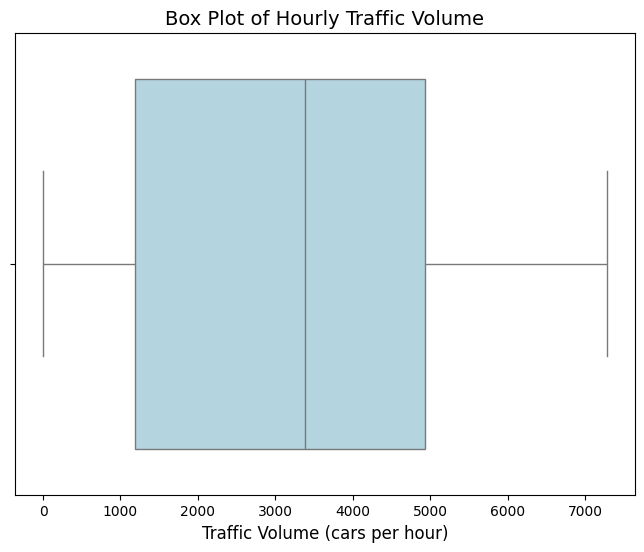

In [35]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df['traffic_volume'], color='lightblue')

plt.title("Box Plot of Hourly Traffic Volume", fontsize=14)
plt.xlabel("Traffic Volume (cars per hour)", fontsize=12)
plt.show()

#### Analysis Question:

**From the box plot, the first quartile (Q1) is around **1200**, and the third quartile (Q3) is around **5000**.**

**Therefore, the Interquartile Range (IQR) can be calculated as:**

**IQR = Q3 − Q1 = 5000 − 1200 = **3800****

**This means that traffic volume changes a lot during the day, showing wide variation in the middle 50% of values.**



#### Task C: Grouped Box Plots (Multivariate Visualisation)

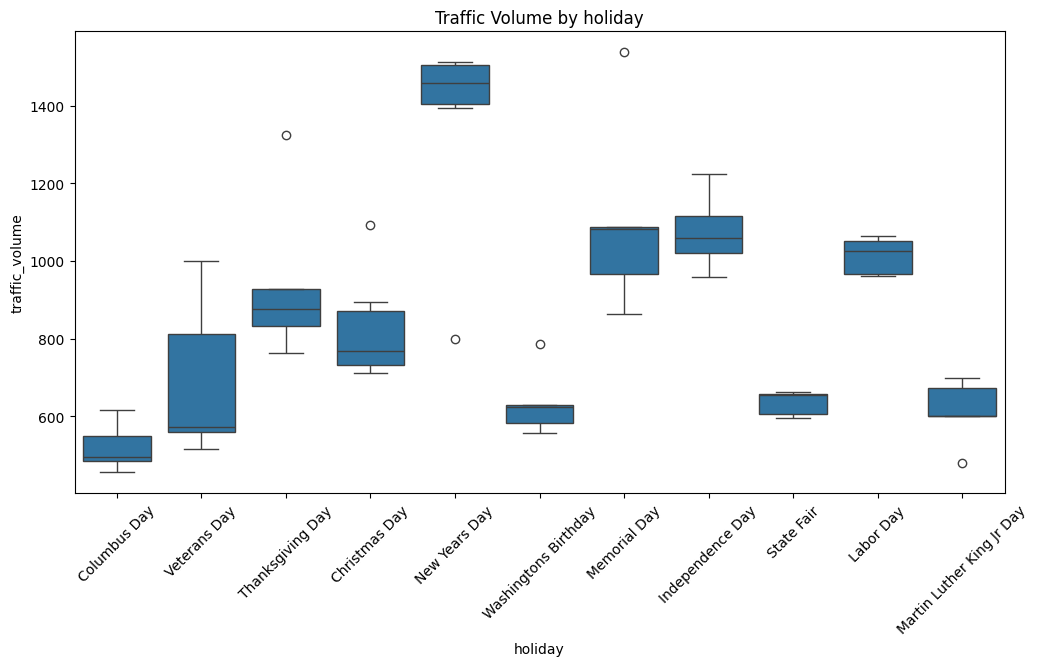

In [30]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='holiday', y='traffic_volume')
plt.title('Traffic Volume by holiday')
plt.xticks(rotation=45)
plt.show()

## Visualizing Correlation

#### Task A: Correlation Matrix and Heatmap

Correlation Matrix:
                traffic_volume      temp   rain_1h   snow_1h  clouds_all
traffic_volume        1.000000  0.130299  0.004714  0.000733    0.067054
temp                  0.130299  1.000000  0.009069 -0.019755   -0.101976
rain_1h               0.004714  0.009069  1.000000 -0.000090    0.004818
snow_1h               0.000733 -0.019755 -0.000090  1.000000    0.027931
clouds_all            0.067054 -0.101976  0.004818  0.027931    1.000000


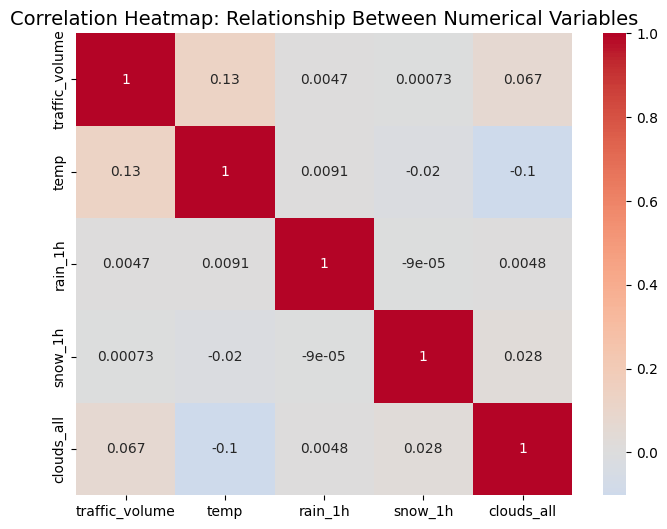

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = ['traffic_volume', 'temp', 'rain_1h', 'snow_1h', 'clouds_all']

# حساب مصفوفة الارتباط
corr_matrix = df[numeric_cols].corr()

print("Correlation Matrix:")
print(corr_matrix)

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap: Relationship Between Numerical Variables", fontsize=14)
plt.show()

**The variable temperature (temp) has the strongest absolute correlation with traffic volume ( 0.13).**
**This correlation is **positive**, meaning that as temperature increases, traffic volume tends to increase slightly as well.**